In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('../../data/matches.csv', parse_dates=['date'])

In [4]:
team = 'Legia Warszawa'

In [5]:
team_matches = data[(data['home_team'] == 'Legia Warszawa') | (data['away_team'] == 'Legia Warszawa')]

In [6]:
team_matches = team_matches.reset_index()

In [7]:
team_matches['team_goals'] = team_matches.apply(lambda x: x.home_team_goal if x.home_team == team else x.away_team_goal, axis=1)

In [8]:
team_matches['opponent_goals'] = team_matches.apply(lambda x: x.home_team_goal if x.home_team != team else x.away_team_goal, axis=1)

In [9]:
goals_per_season = team_matches.groupby('season').aggregate({'team_goals': sum, 'opponent_goals': sum})

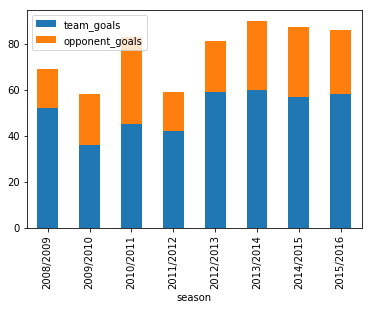

In [10]:
goals_per_season.plot(kind='bar', stacked=True)